# Sección 18: Aplicaciones Físicas y Económicas del Cálculo

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, diff, solve, Eq, sqrt, pi, exp, sin ,log, limit,oo, lambdify

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 1. Movimiento Vertical de Proyectiles

### 1.1 Lanzamiento hacia arriba desde el suelo
**Ecuaciones clave**:
- Posición: $y(t) = -\frac{1}{2}gt^2 + v_0t + y_0$
- Velocidad: $v(t) = y'(t) = -gt + v_0$
- Aceleración: $a(t) = v'(t) = -g$

=== Lanzamiento hacia arriba ===
Altura máxima: 16 ft en t = 1 s
Impacto: t = 2 s con v = -32 ft/s


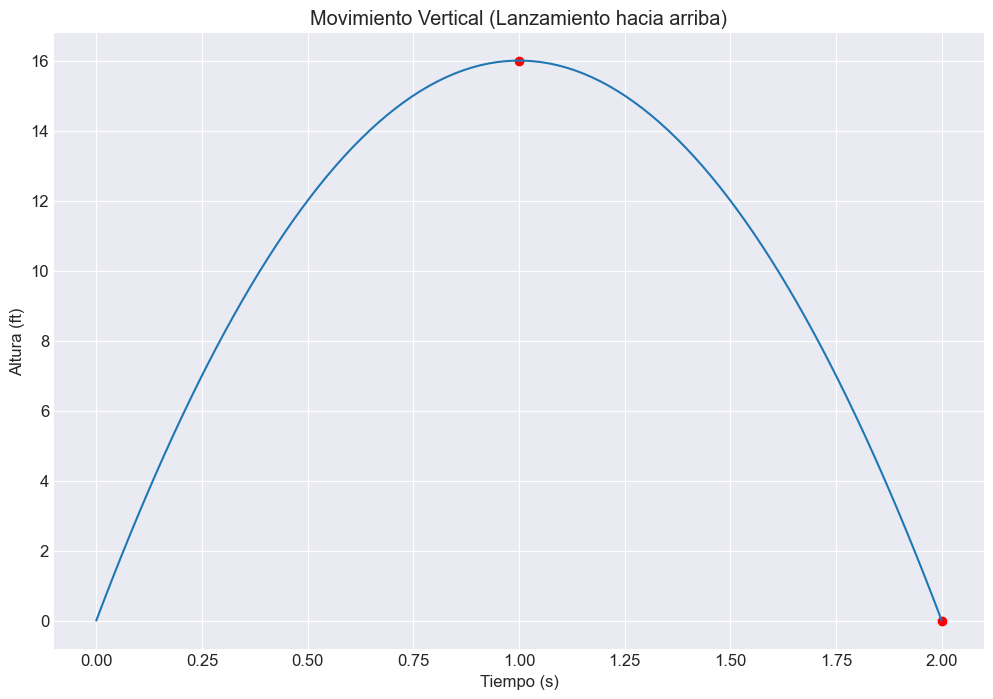

In [5]:
def vertical_motion_up():
    t = symbols('t')
    g = 32  # ft/s²
    v0 = 32  # ft/s
    y0 = 0   # ft
    
    # Función de posición
    y = -16*t**2 + v0*t + y0
    
    # Tiempo en altura máxima (v=0)
    t_max = solve(Eq(diff(y, t), 0), t)[0]
    y_max = y.subs(t, t_max)
    
    # Tiempo de impacto (y=0)
    t_impact = solve(Eq(y, 0), t)[1]  # Segunda solución (t>0)
    v_impact = diff(y, t).subs(t, t_impact)
    
    # Resultados
    print("=== Lanzamiento hacia arriba ===")
    print(f"Altura máxima: {y_max} ft en t = {t_max} s")
    print(f"Impacto: t = {t_impact} s con v = {v_impact} ft/s")
    
    # Visualización
    t_vals = np.linspace(0, float(t_impact), 100)
    y_lamb = lambdify(t, y, 'numpy')
    
    plt.figure()
    plt.plot(t_vals, y_lamb(t_vals))
    plt.scatter([t_max, t_impact], [y_max, 0], color='red')
    plt.title('Movimiento Vertical (Lanzamiento hacia arriba)')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Altura (ft)')
    plt.grid(True)
    plt.show()

vertical_motion_up()

### 1.2 Caída libre desde altura
**Ecuaciones modificadas** ($v_0 = 0$):
- Posición: $y(t) = -\frac{1}{2}gt^2 + y_0$
- Velocidad instantánea: $v(t) = -gt$

In [ ]:
def free_fall():
    t = symbols('t')
    g = 9.8  # m/s²
    y0 = 28  # m
    
    # Función de posición
    y = -4.9*t**2 + y0
    
    # Velocidad instantánea en t=2
    v_inst = diff(y, t).subs(t, 2)
    
    # Velocidad promedio entre t=0 y t=2
    v_avg = (y.subs(t,2) - y.subs(t,0))/2
    
    # Tiempo de impacto
    t_impact = solve(Eq(y, 0), t)[1]
    
    print("\n=== Caída Libre ===")
    print(f"Velocidad instantánea en t=2: {v_inst} m/s")
    print(f"Velocidad promedio [0,2]: {v_avg} m/s")
    print(f"Tiempo de impacto: {t_impact.evalf():.2f} s")

free_fall()


=== Caída Libre ===
Velocidad instantánea en t=2: -19.6000000000000 m/s
Velocidad promedio [0,2]: -9.80000000000000 m/s
Tiempo de impacto: 2.39 s


## 2. Economía: Costos, Ingresos y Utilidades Marginales

### 2.1 Conceptos fundamentales
**Definiciones**:
- Costo marginal: $C'(x)$
- Ingreso marginal: $R'(x)$
- Utilidad marginal: $P'(x) = R'(x) - C'(x)$

### 2.2 Ejemplo de aplicación


=== Análisis Marginal ===
Costo Marginal en x=75: $934
Ingreso Marginal en x=75: $900
Utilidad Marginal en x=75: $-34


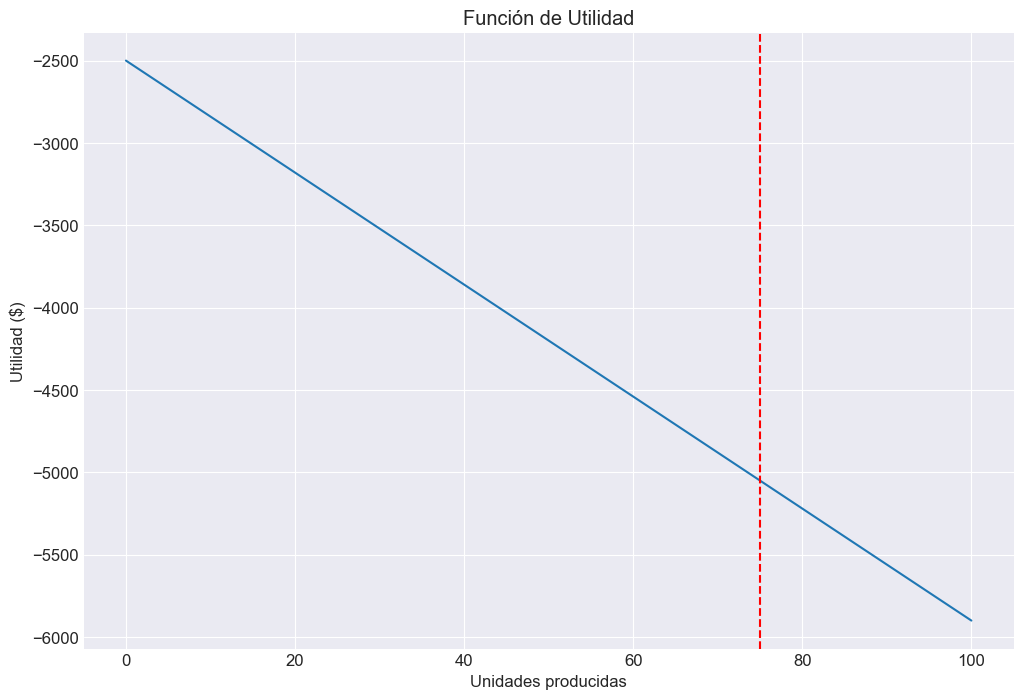

In [ ]:
def marginal_analysis():
    x = symbols('x')
    p = 6*x  # Precio por unidad
    C = 6*x**2 + 34*x + 2500  # Función de costo
    
    # Ingreso y utilidad
    R = x * p
    P = R - C
    
    # Funciones marginales
    C_marginal = diff(C, x)
    R_marginal = diff(R, x)
    P_marginal = diff(P, x)
    
    # Evaluación en x=75
    x_val = 75
    results = {
        'Costo Marginal': C_marginal.subs(x, x_val),
        'Ingreso Marginal': R_marginal.subs(x, x_val),
        'Utilidad Marginal': P_marginal.subs(x, x_val)
    }
    
    print("\n=== Análisis Marginal ===")
    for k, v in results.items():
        print(f"{k} en x=75: ${v}")
    
    # Gráfico de utilidad
    x_vals = np.linspace(0, 100, 100)
    P_lamb = lambdify(x, P, 'numpy')
    
    plt.figure()
    plt.plot(x_vals, P_lamb(x_vals))
    plt.axvline(x=75, color='r', linestyle='--')
    plt.title('Función de Utilidad')
    plt.xlabel('Unidades producidas')
    plt.ylabel('Utilidad ($)')
    plt.grid(True)
    plt.show()

marginal_analysis()

## 3. Relación Posición-Velocidad-Aceleración

### 3.1 Análisis completo de movimiento

In [ ]:
def motion_analysis():
    t = symbols('t')
    x = 3*t**2 + 8*t - 2*t**(5/2)  # Función de posición
    
    # Derivadas
    v = diff(x, t)  # Velocidad
    a = diff(v, t)  # Aceleración
    
    # Evaluación en t=1
    t_val = 1
    v1 = v.subs(t, t_val)
    a1 = a.subs(t, t_val)
    speed1 = abs(v1) # type: ignore
    
    print("\n=== Análisis de Movimiento ===")
    print(f"En t=1:")
    print(f"Posición: {x.subs(t, t_val):.2f} m")
    print(f"Velocidad: {v1:.2f} m/s ({'forward' if v1 > 0 else 'backward'})") # type: ignore
    print(f"Aceleración: {a1:.2f} m/s²")
    print(f"Rapidez: {speed1:.2f} m/s")
    print(f"Velocidad {'decreciente' if a1 < 0 else 'creciente'}") # type: ignore
    print(f"Rapidez {'decreciente' if v1*a1 < 0 else 'creciente'}") # type: ignore

motion_analysis()



=== Análisis de Movimiento ===
En t=1:
Posición: 9.00 m
Velocidad: 9.00 m/s (forward)
Aceleración: -1.50 m/s²
Rapidez: 9.00 m/s
Velocidad decreciente
Rapidez decreciente


## 4. Resumen Teórico

| **Concepto**               | **Fórmulas/Relaciones**                     | **Interpretación**                     |
|----------------------------|---------------------------------------------|----------------------------------------|
| **Movimiento vertical**    | $y(t) = -\frac{1}{2}gt^2 + v_0t + y_0$     | Altura en función del tiempo           |
|                            | $v(t) = y'(t) = -gt + v_0$                 | Velocidad instantánea                  |
| **Economía marginal**      | $C'(x) = \frac{dC}{dx}$                    | Costo de producir una unidad adicional |
|                            | $R'(x) = \frac{dR}{dx}$                    | Ingreso por vender una unidad adicional|
| **Relación movimiento**    | $v(t) = x'(t)$                             | Velocidad como derivada de posición    |
|                            | $a(t) = v'(t) = x''(t)$                    | Aceleración como segunda derivada      |
